<a href="https://colab.research.google.com/github/sankett-tericsoft/First-Project/blob/main/PCA_with_Train_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score


In [77]:
from tensorflow.keras.layers import BatchNormalization

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
% cd /content/drive/MyDrive/Tericsoft

/content/drive/MyDrive/Tericsoft


## Reading the Data

In [5]:
# reading the file
application_train = pd.read_csv('application_train.csv')

# application_test = pd.read_csv('application_test.csv')


In [6]:
# printing the first 5 entries of df
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# The description of each column can be found in the file ‘HomeCredit_columns_description.csv’

## 'Target' column has two classes where 0: Loan is repaid and 1: Load is not repaid.

### Checking the missing values in the application_train df

In [7]:
# removing max limit to see columns and rows of df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# calculating the total error values
error = application_train[application_train['DAYS_EMPLOYED'] == 365243]
print('The no of errors are :', len(error))

(error['TARGET'].value_counts()/len(error))*100

The no of errors are : 55374


0    94.600354
1     5.399646
Name: TARGET, dtype: float64

In [9]:
# Replace the error values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [10]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# Data Preparation:

* Let's check if there are any applicants whose total income is greater than credit

In [11]:
print(f'The shape of the applicatin_train dataset is {application_train.shape[0]} rows and {application_train.shape[1]}')

The shape of the applicatin_train dataset is 307511 rows and 122


In [12]:
application_train.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                    55374
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## With this operation, our data preparation and feature engineering part is completed.

* Separating depepndent and independent features

In [13]:
# printing the ddata types of the features
application_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                   float64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [14]:
len(application_train.describe(include = ['object']).columns)

16

In [15]:
# assigning independent variables to X
X = application_train.drop(['SK_ID_CURR', 'TARGET'],axis=1)

In [16]:
# dependent variable/target variable
y = application_train.pop('TARGET').values

In [17]:
y[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

* We will convert the data into three categories: train, validation and test

In [18]:
# dividing the dataset into train and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                    stratify = y, test_size=0.3, random_state=0)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify = y_temp, test_size=0.5, random_state=24)
print('Shape of X_train:',X_train.shape)
print('Shape of X_val:',X_val.shape)
print('Shape of X_test:',X_test.shape)

Shape of X_train: (215257, 120)
Shape of X_val: (46127, 120)
Shape of X_test: (46127, 120)


* So far, we haven't treated the missing values. So, let's handle the missing values now.

In [19]:
application_train.shape

(307511, 121)

In [20]:
# Seperation of columns into numeric and categorical columns
dtypes = np.array([dt for dt in X_train.dtypes])
all_columns = X_train.columns.values
is_num = dtypes != 'object'

# numerical columns
num_cols = all_columns[is_num]

# categorical columns
cat_cols = all_columns[~is_num]

In [21]:
# list of all column names
X_train.columns.values

array(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASE

In [22]:
X_train[num_cols].shape

(215257, 104)

In [23]:
# Featurization of numeric data
# we will impute with the median data as median is least affected by multiple outliers
imputer_num = SimpleImputer(strategy='median')
X_train_num = imputer_num.fit_transform(X_train[num_cols])
X_val_num = imputer_num.transform(X_val[num_cols])
X_test_num = imputer_num.transform(X_test[num_cols])

In [24]:
# standardizing the values
scaler_num = StandardScaler()
X_train_num1 = scaler_num.fit_transform(X_train_num)
X_val_num1 = scaler_num.transform(X_val_num)
X_test_num1 = scaler_num.transform(X_test_num)

In [25]:
# converting the final imputed dfs into dataframes for future use
X_train_num_final = pd.DataFrame(X_train_num1, columns=num_cols)
X_val_num_final = pd.DataFrame(X_val_num1, columns=num_cols)
X_test_num_final = pd.DataFrame(X_test_num1, columns=num_cols)

In [26]:
# Featurization of categorical data
imputer_cat = SimpleImputer(strategy='constant', fill_value='MISSING')
X_train_cat = imputer_cat.fit_transform(X_train[cat_cols])
X_val_cat = imputer_cat.transform(X_val[cat_cols])
X_test_cat = imputer_cat.transform(X_test[cat_cols])

In [27]:
# converting the imputed categorical variables into dataframe 
X_train_cat1= pd.DataFrame(X_train_cat, columns=cat_cols)
X_val_cat1= pd.DataFrame(X_val_cat, columns=cat_cols)
X_test_cat1= pd.DataFrame(X_test_cat, columns=cat_cols)

In [28]:
# using one hot encoding 
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
X_train_cat2 = ohe.fit_transform(X_train_cat1)
X_val_cat2 = ohe.transform(X_val_cat1)
X_test_cat2 = ohe.transform(X_test_cat1)

In [29]:
# getting the list of columns after performing one hot encoding
cat_cols_ohe = list(ohe.get_feature_names(input_features=cat_cols))

In [30]:
cat_cols_ohe

['NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_MISSING',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS

In [31]:
X_train_cat_final = pd.DataFrame(X_train_cat2, columns = cat_cols_ohe)
X_val_cat_final = pd.DataFrame(X_val_cat2, columns = cat_cols_ohe)
X_test_cat_final = pd.DataFrame(X_test_cat2, columns = cat_cols_ohe)

In [32]:
# Final complete data
X_train_final = pd.concat([X_train_num_final,X_train_cat_final], axis = 1)
X_val_final = pd.concat([X_val_num_final,X_val_cat_final], axis = 1)
X_test_final = pd.concat([X_test_num_final,X_test_cat_final], axis = 1)

print(X_train_final.shape)
print(X_val_final.shape)
print(X_test_final.shape)

(215257, 250)
(46127, 250)
(46127, 250)


In [33]:
# # Saving the Dataframes into CSV files for future use
# X_train_final.to_csv('X_train_final.csv')
# X_val_final.to_csv('X_val_final.csv')
# X_test_final.to_csv('X_test_final.csv')
# # Saving the numpy arrays into text files for future use
# np.savetxt('y.txt', y)
# np.savetxt('y_train.txt', y_train)
# np.savetxt('y_val.txt', y_val)
# np.savetxt('y_test.txt', y_test)

In [34]:
X_train_final.shape, y_train.shape

((215257, 250), (215257,))

# PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=200)

In [37]:
# pca on training data
pca.fit(X_train_final)

X_train_pca = pca.transform(X_train_final)

In [38]:
# pca on validation data
pca.fit(X_val_final)

X_val_pca = pca.transform(X_val_final)

In [39]:
# pca on test data
pca.fit(X_test_final)

X_test_pca = pca.transform(X_test_final)

# Logistic Regression

In [40]:
logistic = LogisticRegression()

In [41]:
# fitting the train data
logistic.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# printing the coefficient values for every feature
logistic.coef_

array([[-3.88069484e-02,  6.13293815e-02,  1.62913664e-01,
        -1.08869114e-01,  9.73280793e-02,  8.92900477e-02,
        -4.05867815e-02,  6.44270547e-02,  3.12470943e-02,
        -1.70234525e-02,  4.22886351e-02,  2.33155586e-02,
        -2.16593626e-01,  4.91752916e-02,  6.10510188e-02,
         1.09188364e-01, -1.91165728e-01,  2.37265024e-02,
        -3.50955101e-02, -5.05633457e-02, -1.13745959e-02,
         1.43038218e-02, -3.22489213e-01, -1.17143391e-01,
        -5.45208892e-02,  5.07560364e-03, -4.64067820e-02,
        -1.08560047e-01, -3.02172944e-02, -1.18867592e-02,
         2.73937141e-02,  6.31946907e-04, -1.16083123e-02,
        -5.52160560e-03, -1.93305036e-02, -2.71673990e-02,
        -2.11027245e-02,  6.62178618e-02, -3.95871676e-03,
         2.26601137e-02, -3.78818438e-02, -4.99308387e-02,
         2.41523881e-02,  1.79621060e-02,  8.41335131e-02,
         6.60469810e-02,  1.28538365e-01, -9.30639141e-02,
         1.32425907e-01, -2.26971703e-01, -8.33089538e-0

In [43]:
# predicting the values
y_pred = logistic.predict(X_test_pca)

In [44]:
accuracy_score(y_test, y_pred)

0.9155592169445227

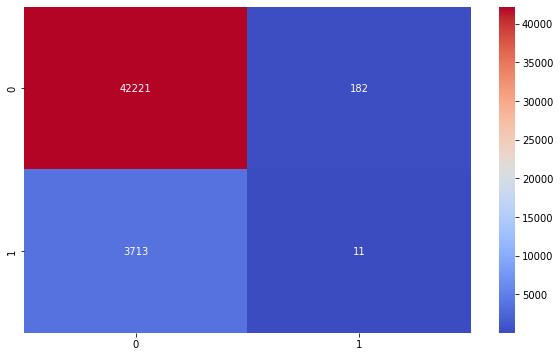

In [45]:
plt.figure(figsize= (10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, cmap = 'coolwarm', fmt= '.5g');

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42403
           1       0.06      0.00      0.01      3724

    accuracy                           0.92     46127
   macro avg       0.49      0.50      0.48     46127
weighted avg       0.85      0.92      0.88     46127



# Neural Network

In [47]:
# importing necessary libraries
import keras
from keras import Sequential
from keras.layers import Dense, Dropout

In [48]:
# creating sequential layer instance
ann = Sequential()

In [49]:
# adding the first layer along with input dimensions
ann.add(Dense(units= 256, activation= 'relu', kernel_initializer= 'he_uniform', input_dim = X_train_pca.shape[1]))

In [50]:
# adding second layer
ann.add(Dense(units = 256, activation='relu', kernel_initializer='he_uniform'))

In [51]:
# adding third layer
ann.add(Dense(units=256, activation='relu', kernel_initializer= 'he_uniform'))

# ann.add(Dropout(0.5))

In [52]:
# # adding fourth layer
# ann.add(Dense(units=512, activation='relu', kernel_initializer= 'he_uniform'))

In [53]:
# adding output layer
ann.add(Dense(units=1, activation= 'sigmoid', kernel_initializer= 'glorot_normal'))

In [54]:
# compiling the model
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [55]:
# printing the summary of the model
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               51456     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 183,297
Trainable params: 183,297
Non-trainable params: 0
_________________________________________________________________


In [56]:
ann.fit(X_train_pca, y_train, epochs = 20, validation_data=(X_val_pca, y_val))

Epoch 1/20
6727/6727 [==============================] - 29s 4ms/step - loss: 0.2585 - accuracy: 0.9190 - val_loss: 0.3250 - val_accuracy: 0.9182
Epoch 2/20
6727/6727 [==============================] - 28s 4ms/step - loss: 0.2500 - accuracy: 0.9193 - val_loss: 0.3272 - val_accuracy: 0.9187
Epoch 3/20
6727/6727 [==============================] - 27s 4ms/step - loss: 0.2473 - accuracy: 0.9194 - val_loss: 0.3256 - val_accuracy: 0.9192
Epoch 4/20
6727/6727 [==============================] - 28s 4ms/step - loss: 0.2444 - accuracy: 0.9197 - val_loss: 0.3406 - val_accuracy: 0.9184
Epoch 5/20
6727/6727 [==============================] - 28s 4ms/step - loss: 0.2411 - accuracy: 0.9204 - val_loss: 0.3368 - val_accuracy: 0.9178
Epoch 6/20
6727/6727 [==============================] - 27s 4ms/step - loss: 0.2363 - accuracy: 0.9215 - val_loss: 0.3395 - val_accuracy: 0.9161
Epoch 7/20
6727/6727 [==============================] - 27s 4ms/step - loss: 0.2314 - accuracy: 0.9230 - val_loss: 0.3471 - val_ac

In [57]:
y_pred_ann = ann.predict(X_test_pca)

In [58]:
yp = []
for element in y_pred_ann:
    if element > 0.5:
        yp.append(1)
    else:
        yp.append(0)

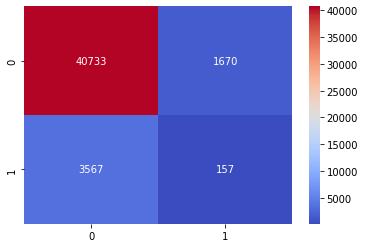

In [59]:
# printing confusion matrix
sns.heatmap(confusion_matrix(y_test, yp), annot=True, cmap= 'coolwarm', fmt='.6g')

In [60]:
accuracy_score(y_test, yp)

0.8864656275066664

In [62]:
print(f'The accuracy of logistic_model: {round(accuracy_score(y_test, y_pred), 4) * 100}%')
print(f'The accuracy of ann_model: {round(accuracy_score(y_test, yp), 4) * 100}%')

The accuracy of logistic_model: 91.56%
The accuracy of ann_model: 88.64999999999999%


# Batch Normalization

In [91]:
del model

In [92]:
model = Sequential()

In [93]:
# adding the first layer along with input dimensions
model.add(Dense(units= 256, activation= 'relu', 
              kernel_initializer= 'he_uniform', input_dim = X_train_pca.shape[1]))

# batch noemalization
model.add(BatchNormalization())

# dropout
model.add(Dropout(0.5))

In [94]:
# adding second layer
model.add(Dense(units = 256, activation='relu', kernel_initializer='he_uniform'))

# dropout
model.add(Dropout(0.5))

In [95]:
# adding third layer
model.add(Dense(units=256, activation='relu', kernel_initializer= 'he_uniform'))

model.add(Dropout(0.5))

In [96]:
# adding output layer
model.add(Dense(units=1, activation= 'sigmoid', kernel_initializer= 'glorot_normal'))

In [97]:
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               51456     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

In [99]:
model.fit(X_train_pca, y_train, epochs = 20, validation_data=(X_val_pca, y_val))

Epoch 1/20
6727/6727 [==============================] - 33s 5ms/step - loss: 0.2806 - accuracy: 0.9174 - val_loss: 0.3144 - val_accuracy: 0.9193
Epoch 2/20
6727/6727 [==============================] - 32s 5ms/step - loss: 0.2624 - accuracy: 0.9191 - val_loss: 0.3179 - val_accuracy: 0.9193
Epoch 3/20
6727/6727 [==============================] - 32s 5ms/step - loss: 0.2598 - accuracy: 0.9188 - val_loss: 0.3097 - val_accuracy: 0.9193
Epoch 4/20
6727/6727 [==============================] - 31s 5ms/step - loss: 0.2592 - accuracy: 0.9188 - val_loss: 0.2994 - val_accuracy: 0.9193
Epoch 5/20
6727/6727 [==============================] - 31s 5ms/step - loss: 0.2582 - accuracy: 0.9189 - val_loss: 0.2982 - val_accuracy: 0.9193
Epoch 6/20
6727/6727 [==============================] - 31s 5ms/step - loss: 0.2577 - accuracy: 0.9187 - val_loss: 0.3005 - val_accuracy: 0.9193
Epoch 7/20
6727/6727 [==============================] - 32s 5ms/step - loss: 0.2573 - accuracy: 0.9186 - val_loss: 0.3139 - val_ac

In [100]:
y_pred_batchnorm = model.predict(X_test_pca)

In [101]:
y_pred_batchnorm[:5]

array([[0.02603686],
       [0.10157067],
       [0.05416825],
       [0.05570143],
       [0.05308688]], dtype=float32)

In [102]:
y_pred_norm = []

for i in y_pred_batchnorm:
  if i > 0.5:
    y_pred_norm.append(1)
  else:
    y_pred_norm.append(0)

In [104]:
accuracy_score(y_test, y_pred_norm)

0.9191796561666703

In [105]:
print(classification_report(y_test, y_pred_norm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42403
           1       0.00      0.00      0.00      3724

    accuracy                           0.92     46127
   macro avg       0.46      0.50      0.48     46127
weighted avg       0.85      0.92      0.88     46127



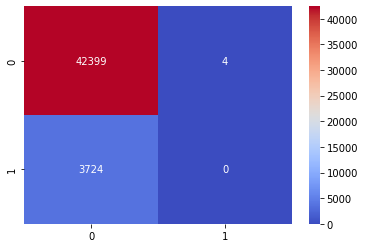

In [107]:
sns.heatmap(confusion_matrix(y_test, y_pred_norm), annot=True, cmap='coolwarm', fmt='.6g')